<a href="https://colab.research.google.com/github/Ken-huea/image-recognition/blob/main/CNN%E3%81%A8cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 今回の狙い

引き続き、cifar10の学習です。しかし今回使用するモデルは<font color="red">外部からとってきます。</font>

他人が作成したモデルを上手い事こちらに流用しよう。というスタンスですね。
それでどのくらい精度が出るかという話ですが、70以上を目指しましょう。

語録

ニコイチ：2つのジャンクを１つの製品にする事。車修理等でよく用いられております。

それに転じて２つ以上の物を掛け合わせて１つの物体を作る事。
私の好きな言葉です。

#### 転移学習について

ポイントは<font color="red">どの部分を切り取って使用する</font>のかを考える。

例えばvgg16というモデルをインポートして使うにするとしても無茶な訳ですよ。

そのまま使用すると画像のサイズ`224*224で1000クラス分類`ですからね。
cifar10は`画像サイズ：32*32で10クラス分類`。

上手い事つぎはぎしましょう。

そして転移学習からモデルを取り入れてニコイチしたらちゃんと学習させて結果などを確認しましょう。

元々は1000クラス分類していたモデルを10クラス分類にしたのだから結果確認は当然必須ですよね。

# 実装

### モジュールのインポートとデータのロード

In [ ]:
# モジュールのインポート
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# データのロードをしてください
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# 時間かかるのが嫌なので横着。
X_train = X_train[:30000]
X_test = X_test[:10000]

y_train = to_categorical(y_train)[:30000]
y_test = to_categorical(y_test)[:10000]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# データセットの個数を表示 ⇒只の確認。
print(X_train.shape[0], 'train samples')
print(y_train.shape[0], 'train samples')

print(X_test.shape[0], 'test samples')
print(y_test.shape[0], 'test samples')

# データの形状を確認
print(X_train[0].shape) # (32, 32, 3)
print(y_train[0].shape) # (10,) ちゃんとカテゴリカル変数。


30000 train samples
30000 train samples
10000 test samples
10000 test samples
(32, 32, 3)
(10,)


### 転移学習を用いたモデル構築
VGG16を引数を指定しインポート

[詳細はこちら](https://premium.aidemy.jp/courses/5100/exercises/HkqlI__opBM)

モデルBGG16のインポート時の引数が気になる方はこちら。 ⇒[引数①](https://qiita.com/sey323/items/29c24204b9881d79ccb7)　　[引数②](https://note.nkmk.me/python-tensorflow-keras-applications-pretrained-models/)

include_top=False：<font color="red">出力層</font>を除外しています。引用元と異なりますが、出力層です。

状況に合わせてTrue or Falseを選択してください。　今回は元の100クラス分類でなく10クラス分類なのでFlase

input_tensor:入力画像のshape

weights='imagenet'：重みの種類。⇒因みにこれはデフォルトで重みを持ってきました。という事。

上記を参考にして引数を設定。input_tensorの定義等。
そしたらモデルをインポート致します。　当然summaryで確認しましょう。

In [ ]:
# 上記を参考にして引数を設定。input_tensorの定義等。
input_tensor = Input(shape=(32, 32, 3))
model_vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

model_vgg16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

確認できましたでしょうか？これはまだ途中ですからね。
このインポートしたやつと、<font color="red">私が作成したもの</font>をニコイチします。

In [ ]:
# これが私が作成したコード出力層が10に収まっていますね。
# 特徴量抽出部分のモデルを作成しています
top_model = Sequential()

top_model.add(Flatten(input_shape=model_vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='sigmoid'))
top_model.add(Dropout(0.5))
top_model.add(Dense(10, activation='softmax'))

上記はは単純にデータの形状のみを構築していますので実際に連結させましょう。　
連結するコードはこちら


```
model = Model(inputs =model_vgg16.input,outputs=top_model(model_vgg16.output))
```



In [ ]:
#連結するコード。
model = Model(inputs =model_vgg16.input,outputs=top_model(model_vgg16.output))

# inputs =model_vgg16.input
# outputs=top_model(model_vgg16.output)

vgg16は優れたモデルなので流用している訳ですよね。なので<font color="red">重み</font>も固定しましょう。

下記のコードにて**重みを固定**を行っております。

転移学習で持ってきた重み15層までを動かないようにしております。

そこから先は柔軟性を持たせるために動くようにしております。
19層の中で15層までは固定。　残りの4層は<font color="red">動かせる</font>ようにしている。

In [ ]:
# 15層目までの重みを固定しています。
for layer in model.layers[:15]:
    layer.trainable = False

In [ ]:
#　モデルの確認をしてみましょう
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### 学習と精度評価

連結した後(out put先)のモデルを指定してください。今回は<font color="red">model</font>

```
model.compile
```


In [ ]:
# コンパイルをしています
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# ハイパーパラメータ
batch_size = 256  # バッチサイズ 32,64,128,256,512 あたり
epochs = 100       # エポック数(学習の繰り返し回数)
val_split = 0,1   # 訓練データのうちx%をvalidation dataとして分割して使います。
pati_time = 15    # y回学習しても向上しない場合は学習を打ち切ります。

In [ ]:
from keras import callbacks                   # コールバック（1epoch終了毎に呼び出される）

    # 構築したモデルで学習（学習データ:trainのうち、10％を検証データ:validationとして使用）
history = model.fit(X_train, 
                        y_train, 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        verbose=1, 
                        validation_split=0.1,
                        callbacks=[
                            callbacks.EarlyStopping(monitor='val_loss',patience = pati_time),
                            callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='val_loss', save_best_only=True)
                            ]
                    )

Epoch 1/100
106/106 [==============================] - 11s 100ms/step - loss: 1.1880 - accuracy: 0.6028 - val_loss: 1.0390 - val_accuracy: 0.6543
Epoch 2/100
106/106 [==============================] - 10s 99ms/step - loss: 1.1513 - accuracy: 0.6120 - val_loss: 1.0140 - val_accuracy: 0.6670
Epoch 3/100
106/106 [==============================] - 10s 94ms/step - loss: 1.1255 - accuracy: 0.6200 - val_loss: 1.0047 - val_accuracy: 0.6650
Epoch 4/100
106/106 [==============================] - 11s 102ms/step - loss: 1.1023 - accuracy: 0.6324 - val_loss: 0.9832 - val_accuracy: 0.6730
Epoch 5/100
106/106 [==============================] - 10s 93ms/step - loss: 1.0839 - accuracy: 0.6387 - val_loss: 0.9702 - val_accuracy: 0.6733
Epoch 6/100
106/106 [==============================] - 10s 94ms/step - loss: 1.0606 - accuracy: 0.6439 - val_loss: 0.9600 - val_accuracy: 0.6727
Epoch 7/100
106/106 [==============================] - 10s 94ms/step - loss: 1.0351 - accuracy: 0.6552 - val_loss: 0.9420 - val_

### 精度評価

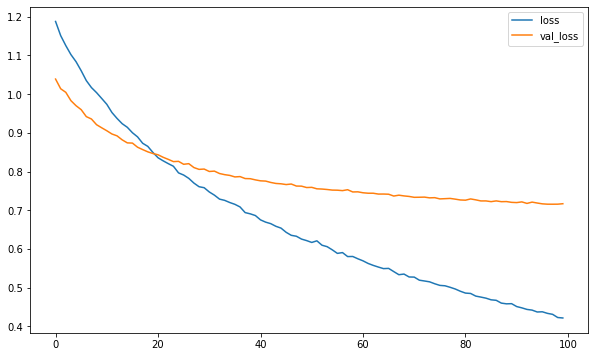

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
# 学習過程のプロット
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")

plt.legend()

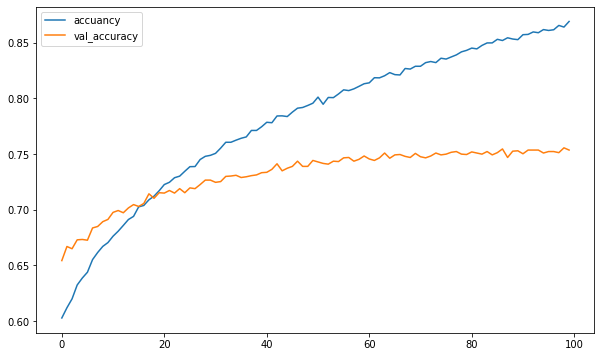

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
# 学習過程のプロット

plt.plot(history.epoch, history.history["accuracy"], label="accuancy")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")

plt.legend()

40位で打ち止めがよさそうか？

In [ ]:
# テストデータを用いた最終的、パフォーマンス計測
score = model.evaluate(X_test, 
                            y_test,
                            verbose=0
                            )
 
print("testデータでのloss：",score[0]) # lossの表示。
print("testデータでのaccuracy：",score[1]) # accuracyの表示。

testデータでのloss： 0.7423763871192932
testデータでのaccuracy： 0.7504000067710876


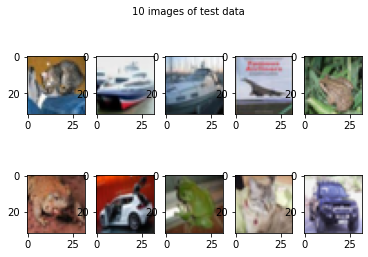

313/313 [==============================] - 8s 25ms/step - loss: 0.7424 - accuracy: 0.7504
これが予測値です [3 8 8 0 6 6 1 6 3 9]
これが実測値です [3 8 8 0 6 6 1 6 3 1]
これが正解率です 0.9


In [ ]:
# データの可視化（検証データの先頭の10枚）
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("10 images of test data",fontsize=10)
plt.show()

# 予測（検証データの先頭の10枚）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)

# 実測値(y_test)
acutal = np.argmax(y_test[0:10], axis=1)

# 正解率
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,acutal)

scores = model.evaluate(X_test, y_test, verbose=1)
print("これが予測値です",pred)
print("これが実測値です",acutal)
print("これが正解率です",acc)